<h1 align="center">
<img src="https://drive.google.com/uc?export=view&id=1_ZkE3dnYg9KykzdZE6lIK2s_q_nbiKk_" width="160" height="160">
</h1>
<h1 align="center">Statistical Learning - 255381</h1>
<h3 align="center">Dr. Hoda Mohammadzade</h3>
<h5 align="center">Sharif University of Technology<br/>Electrical Engineering Department<br/>  Spring 2022</h5>

---

# Problem Set 03
<h4 align="center">Vahid Pourakbar     400205511</h4>


# Question 7

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt


In [2]:
# load the Ozone dataset
Ozone_dataset = pd.read_csv('LAozone.data')
Ozone_dataset.head()

,ozone,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,3,5710,4,28,40,2693,-25,87,250,3
1,5,5700,3,37,45,590,-24,128,100,4
2,5,5760,3,51,54,1450,25,139,60,5
3,6,5720,4,69,35,1568,15,121,60,6
4,4,5790,6,19,45,2631,-33,123,100,7


## Part A

In [3]:
# defining feature matrix(X) and response vector(y)
X = Ozone_dataset[['vh','wind','humidity','temp','ibh','dpg','ibt','vis','doy']]
y = Ozone_dataset['ozone']

# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# train the model
model = LinearRegression().fit(X_train,y_train)

print('Coefficients:\n', 'intercept: ', model.intercept_, '\n slope:', model.coef_)
print('Variance score: ', model.score(X_test, y_test))
print('MSE for train sets:', metrics.mean_squared_error(y_train, model.predict(X_train)))
print('MSE for test  sets:', metrics.mean_squared_error(y_test, model.predict(X_test)))


Coefficients:
 intercept:  21.422340959501696 
 slope: [-5.43599071e-03 -1.37215300e-01  6.09675569e-02  2.57959352e-01
 -2.71654900e-05  6.85782788e-03  3.78033293e-02 -9.81395744e-03
 -1.15836381e-02]
Variance score:  0.6955078374867558
MSE for train sets: 20.440581670652474
MSE for test  sets: 16.77015206002696


## Part B

MSE for train sets: 26.33411431286118
MSE for test  sets: 21.859300622171627


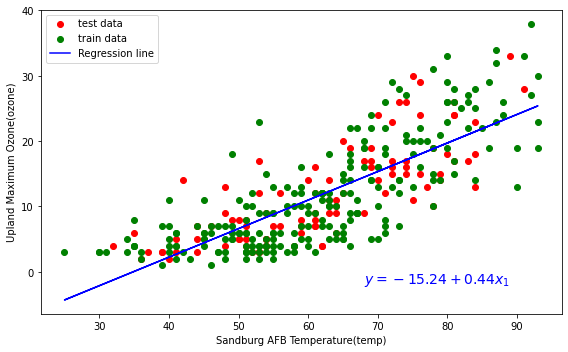

In [4]:
X2 = Ozone_dataset[['temp']]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2)
model2 = LinearRegression().fit(X2_train,y2_train)

print('MSE for train sets:', metrics.mean_squared_error(y2_train, model2.predict(X2_train)))
print('MSE for test  sets:', metrics.mean_squared_error(y2_test, model2.predict(X2_test)))

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X2_test, y2_test, color='r', label='test data')
ax.scatter(X2_train, y2_train, color='g', label='train data')
ax.plot(X2_train['temp'], model2.predict(X2_train), color="blue", label='Regression line')
ax.set_ylabel('Upland Maximum Ozone(ozone)')
ax.set_xlabel('Sandburg AFB Temperature(temp)')
ax.legend()
ax.text(0.62, 0.1,'$y = {:.2f} + {:.2f}x_1$'.format(model2.intercept_, model2.coef_[0]),
                 color='b', fontsize=14, transform=ax.transAxes)

fig.tight_layout()

## Part C

dataset1:
MSE for train sets: 10.272927673428017
MSE for test  sets: 16.468116400084092
dataset2:
MSE for train sets: 27.566384815790183
MSE for test  sets: 41.301605654240674


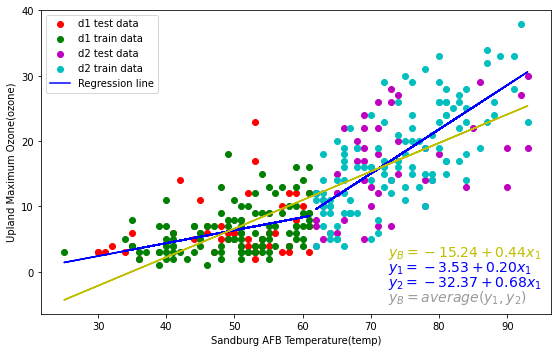

In [5]:
X3 = Ozone_dataset[['ozone', 'temp']]

dataset1 = [list(X3.values[i]) for i in range(len(X3.values)) if X3.values[i][1] < int(X2.median())]
dataset1 = pd.DataFrame(dataset1, columns = ['ozone', 'temp'])
dataset2 = [list(X3.values[i]) for i in range(len(X3.values)) if X3.values[i][1] >= int(X2.median())]
dataset2 = pd.DataFrame(dataset2, columns = ['ozone', 'temp'])

d1X_train, d1X_test, d1y_train, d1y_test = train_test_split(dataset1[['temp']], dataset1['ozone'], test_size=0.3, random_state=2)
model3 = LinearRegression().fit(d1X_train,d1y_train)
d2X_train, d2X_test, d2y_train, d2y_test = train_test_split(dataset2[['temp']], dataset2['ozone'], test_size=0.3, random_state=2)
model4 = LinearRegression().fit(d2X_train,d2y_train)

print('dataset1:')
print('MSE for train sets:', metrics.mean_squared_error(d1y_train, model3.predict(d1X_train)))
print('MSE for test  sets:', metrics.mean_squared_error(d1y_test, model3.predict(d1X_test)))
print('dataset2:')
print('MSE for train sets:', metrics.mean_squared_error(d2y_train, model4.predict(d2X_train)))
print('MSE for test  sets:', metrics.mean_squared_error(d2y_test, model4.predict(d2X_test)))

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(d1X_test, d1y_test, color='r', label='d1 test data')
ax.scatter(d1X_train, d1y_train, color='g', label='d1 train data')
ax.scatter(d2X_test, d2y_test, color='m', label='d2 test data')
ax.scatter(d2X_train, d2y_train, color='c', label='d2 train data')
ax.plot(d1X_train['temp'], model3.predict(d1X_train), color='b', label='Regression line')
ax.plot(d2X_train['temp'], model4.predict(d2X_train), color='b')
ax.set_ylabel('Upland Maximum Ozone(ozone)')
ax.set_xlabel('Sandburg AFB Temperature(temp)')
ax.legend()
ax.plot(X2_train['temp'], model2.predict(X2_train), color='y', label='Part B Regression line')
ax.text(0.68, 0.19,'$y_B = {:.2f} + {:.2f}x_1$'.format(model2.intercept_, model2.coef_[0]),
                 color='y', fontsize=14, transform=ax.transAxes)
ax.text(0.68, 0.14,'$y_1 = {:.2f} + {:.2f}x_1$'.format(model3.intercept_, model3.coef_[0]),
                 color='b', fontsize=14, transform=ax.transAxes)
ax.text(0.68, 0.09,'$y_2 = {:.2f} + {:.2f}x_1$'.format(model4.intercept_, model4.coef_[0]),
                 color='b', fontsize=14, transform=ax.transAxes)
ax.text(0.68, 0.04, '$y_B = average(y_1, y_2)$',
                 color='grey', fontsize=14, transform=ax.transAxes, alpha=0.8)
fig.tight_layout()

In [6]:
# %reset -f

# Question 8

In [7]:
Insurance_dataset = pd.read_csv('insurance.csv')
Insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16.885
1,18,male,33.770,1,no,southeast,1.726
2,28,male,33.000,3,no,southeast,4.449
3,33,male,22.705,0,no,northwest,21.984
4,32,male,28.880,0,no,northwest,3.867


## Part A

In [8]:
X = Insurance_dataset[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = Insurance_dataset['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, shuffle=True)

metrics.mean_squared_error(y_test, [y_train.mean()]*y_test.values.size)

150.45523860057162

## Part B

In [9]:
# categorical columns
cat_col = Insurance_dataset.select_dtypes(include='object').columns

dummy_dataset = Insurance_dataset.drop(columns=cat_col)
for var in cat_col:
    dummy_dataset = dummy_dataset.join(pd.get_dummies(Insurance_dataset[var], prefix=var, drop_first=True))
dummy_dataset.head()

X2 = dummy_dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=2, shuffle=True)

model2 = LinearRegression().fit(X2_train,y2_train)

print('Coefficients:\n', 'intercept: ', model2.intercept_, '\n slope:', model2.coef_)
print('Variance score: ', model2.score(X2_test, y2_test))
print('MSE for train sets:', metrics.mean_squared_error(y2_train, model2.predict(X2_train)))
print('MSE for test  sets:', metrics.mean_squared_error(y2_test, model2.predict(X2_test)))


Coefficients:
 intercept:  -11.759257913278491 
 slope: [ 0.25122592  0.3328221   0.58792068 -0.0371514  23.91234775 -0.37914695
 -0.78443245 -0.94722219]
Variance score:  0.7449408788113172
MSE for train sets: 36.10023907559572
MSE for test  sets: 38.305056850279506


## Part C

In [10]:
# residual sum of squares(RSS)
RSS = np.sum(np.square(y2_train - model2.predict(X2_train)))

# Variance of Noise = RSS/(n-p-1)
var_eps = RSS / (y2_train.size - len(list(X2_train.columns)) - 1)
print('Variance of Noise: ', var_eps)

# R_square(𝑅2Statistics)
print('R^2 = 1-(var(e)/var(y)):', 1 - (var_eps/y2_train.var()))
print('R^2 = sklearn.metrics.r2_score:', metrics.r2_score(y2_train, model2.predict(X2_train)))

Variance of Noise:  36.40646165022377
R^2 = 1-(var(e)/var(y)): 0.7501491927517477
R^2 = sklearn.metrics.r2_score: 0.7520189836385448
